# GDA

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
def read_x(file):
    d1 = pandas.read_csv(file, header=None).values
    x = []
    for entry in d1:
        d2 = entry[0].split()
        x.append(list(map(int, d2)))

    return np.asarray(x)


def read_y(file):
    d1 = pandas.read_csv(file, header=None).values
    y = []
    for entry in d1:
        d2 = entry[0]
        if d2 == 'Alaska':
            y.append(0)
        else:
            y.append(1)

    return np.asarray(y)

In [4]:
x_file = 'data/q4x.dat'
y_file = 'data/q4y.dat'

X = read_x(x_file)
Y = read_y(y_file)
m = len(Y)

Text(0, 0.5, 'x2 (marine water)')

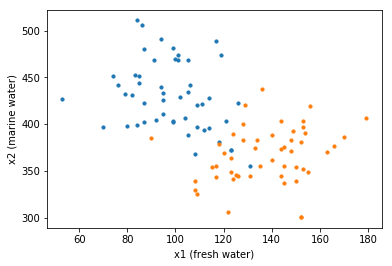

In [5]:
 # plot the points
ind0 = np.where(Y == 0)
ind1 = np.where(Y == 1)
plt.scatter(X[ind0, 0], X[ind0, 1], s=10, label='y=0 (Alaska)')
plt.scatter(X[ind1, 0], X[ind1, 1], s=10, label='y=1 (Canada)')
plt.xlabel('x1 (fresh water)')
plt.ylabel('x2 (marine water)')

### Linear decision boundary

Linear separator:
phi = 0.5 
mu_0 = [ 98.38 429.66] 
mu_1 = [137.46 366.62] 
sigma = [[ 287.482  -26.748]
 [ -26.748 1123.25 ]]


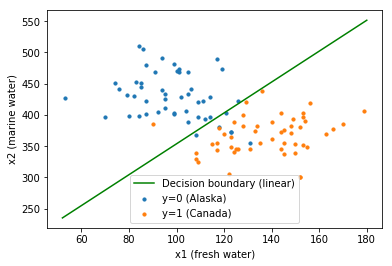

In [7]:
def compute_parameters_linear(X, Y):

    ind0 = np.where(Y == 0)[0]
    ind1 = np.where(Y == 1)[0]

    phi = len(ind1) / m
    mu0 = sum(X[ind0, :])/len(ind0)
    mu1 = sum(X[ind1, :])/len(ind1)
    mu_arr = []
    for y in Y:
        mu_arr.append(mu0*(1-y) + mu1*y)
    sigma = ((X - mu_arr).T @ (X - mu_arr))/m

    print('Linear separator:\nphi = {} \nmu_0 = {} \nmu_1 = {} \nsigma = {}'.format(phi, mu0, mu1, sigma))

    # draw the decision boundary
    xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    sig_inv = np.linalg.inv(sigma)
    A = (mu1.T @ sig_inv @ mu1 - mu0.T @ sig_inv @ mu0)/2
    mu_diff = mu1 - mu0
    B = mu_diff @ sig_inv[:, 0]
    C = mu_diff @ sig_inv[:, 1]
    yy = (A - B*xx) / C
    plt.plot(xx, yy, 'g', label='Decision boundary (linear)')

    return phi, mu0, mu1, sigma

 # plot the points
ind0 = np.where(Y == 0)
ind1 = np.where(Y == 1)
plt.scatter(X[ind0, 0], X[ind0, 1], s=10, label='y=0 (Alaska)')
plt.scatter(X[ind1, 0], X[ind1, 1], s=10, label='y=1 (Canada)')
plt.xlabel('x1 (fresh water)')
plt.ylabel('x2 (marine water)')

compute_parameters_linear(X, Y)
plt.legend()
plt.show()

### Quadratic decision boundary

Quadratic separator:
phi = 0.5 
mu_0 = [ 98.38 429.66] 
mu_1 = [137.46 366.62] 
sig0 = [[ 255.3956 -184.3308]
 [-184.3308 1371.1044]] 
sig1 = [[319.5684 130.8348]
 [130.8348 875.3956]]


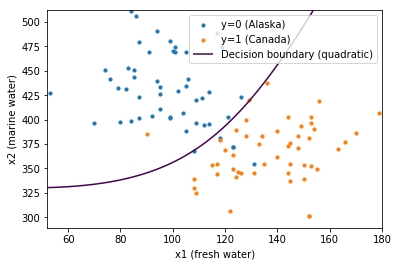

In [9]:
def compute_parameters_quadratic(X, Y):
    m = len(Y)
    ind0 = np.where(Y == 0)[0]
    ind1 = np.where(Y == 1)[0]

    phi = len(ind1) / m
    mu0 = sum(X[ind0, :])/len(ind0)
    mu1 = sum(X[ind1, :])/len(ind1)
    mu_arr = []
    for y in Y:
        mu_arr.append(mu0*(1-y) + mu1*y)
    sig0 = ((X[ind0, :] - mu0).T @ (X[ind0, :] - mu0))/len(ind0)
    sig1 = ((X[ind1, :] - mu1).T @ (X[ind1, :] - mu1))/len(ind1)
    print('Quadratic separator:\nphi = {} \nmu_0 = {} \nmu_1 = {} \nsig0 = {} \nsig1 = {}'.format(phi, mu0, mu1, sig0, sig1))

    # draw the decision boundary
    xx1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    xx2 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    sig0in = np.linalg.inv(sig0)
    sig1in = np.linalg.inv(sig1)
    A = sig0in - sig1in
    B = sig1in @ mu1 - sig0in @ mu0
    C = mu0.T @ sig0in @ mu0 - mu1.T @ sig1in @ mu1 + np.log(np.linalg.det(sig0) / np.linalg.det(sig1))
    XX1, XX2 = np.meshgrid(xx1, xx2)
    JJ = np.zeros_like(XX1)
    for i in range(XX1.shape[0]):
        for j in range(XX2.shape[1]):
            x12 = np.asarray([XX1[i, j], XX2[i, j]])
            JJ[i, j] = x12.T @ A @ x12 + 2 * B.T @ x12 + C
    CP = plt.contour(XX1, XX2, JJ, [0])
    CP.collections[0].set_label('Decision boundary (quadratic)')
    plt.legend()

 # plot the points
ind0 = np.where(Y == 0)
ind1 = np.where(Y == 1)
plt.scatter(X[ind0, 0], X[ind0, 1], s=10, label='y=0 (Alaska)')
plt.scatter(X[ind1, 0], X[ind1, 1], s=10, label='y=1 (Canada)')
plt.xlabel('x1 (fresh water)')
plt.ylabel('x2 (marine water)')

compute_parameters_quadratic(X, Y)
plt.legend()
plt.show()